# Train&Validation - Test Split
****************

**<div itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-5567-801X" href="https://orcid.org/0000-0001-5567-801X" target="orcid.widget" rel="me noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-left:0em;"  alt="ORCID iD icon">Adrián Arnaiz-Rodríguez</a></div>**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Approach" data-toc-modified-id="Approach-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Approach</a></span></li><li><span><a href="#Get-the-valid-number-of-slices-of-each-volume" data-toc-modified-id="Get-the-valid-number-of-slices-of-each-volume-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the valid number of slices of each volume</a></span><ul class="toc-item"><li><span><a href="#How-many-RELEVANT-Slides-has-each-volume?" data-toc-modified-id="How-many-RELEVANT-Slides-has-each-volume?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>How many RELEVANT Slides has each volume?</a></span></li><li><span><a href="#How-many-volumes-should-be-in-each-set?" data-toc-modified-id="How-many-volumes-should-be-in-each-set?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>How many volumes should be in each set?</a></span></li><li><span><a href="#How-many-slides-should-be-on-each-set?" data-toc-modified-id="How-many-slides-should-be-on-each-set?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>How many slides should be on each set?</a></span></li></ul></li><li><span><a href="#Stratified-vol-splitting" data-toc-modified-id="Stratified-vol-splitting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stratified vol splitting</a></span><ul class="toc-item"><li><span><a href="#Select-metadata-from-our-MRI-volumes" data-toc-modified-id="Select-metadata-from-our-MRI-volumes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Select metadata from our MRI volumes</a></span></li><li><span><a href="#Identify-non-age-volumes-and-remove-duplicated" data-toc-modified-id="Identify-non-age-volumes-and-remove-duplicated-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Identify non-age volumes and remove duplicated</a></span></li><li><span><a href="#Identify-attribute-distribution" data-toc-modified-id="Identify-attribute-distribution-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Identify attribute distribution</a></span><ul class="toc-item"><li><span><a href="#Age" data-toc-modified-id="Age-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Sex" data-toc-modified-id="Sex-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Sex</a></span></li><li><span><a href="#Ethnic" data-toc-modified-id="Ethnic-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Ethnic</a></span></li></ul></li><li><span><a href="#Stratify-by-age-and-ethnic" data-toc-modified-id="Stratify-by-age-and-ethnic-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Stratify by age and ethnic</a></span><ul class="toc-item"><li><span><a href="#How-are-going-to-be-stratified?" data-toc-modified-id="How-are-going-to-be-stratified?-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>How are going to be stratified?</a></span><ul class="toc-item"><li><span><a href="#Test" data-toc-modified-id="Test-3.4.1.1"><span class="toc-item-num">3.4.1.1&nbsp;&nbsp;</span>Test</a></span></li><li><span><a href="#Train-and-validation" data-toc-modified-id="Train-and-validation-3.4.1.2"><span class="toc-item-num">3.4.1.2&nbsp;&nbsp;</span>Train and validation</a></span></li></ul></li><li><span><a href="#Check-Number-of-slices-in-each-set" data-toc-modified-id="Check-Number-of-slices-in-each-set-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Check Number of slices in each set</a></span><ul class="toc-item"><li><span><a href="#Train&amp;Val" data-toc-modified-id="Train&amp;Val-3.4.2.1"><span class="toc-item-num">3.4.2.1&nbsp;&nbsp;</span>Train&amp;Val</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-3.4.2.2"><span class="toc-item-num">3.4.2.2&nbsp;&nbsp;</span>Test</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Conclussion" data-toc-modified-id="Conclussion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclussion</a></span><ul class="toc-item"><li><span><a href="#Size-of-each-set" data-toc-modified-id="Size-of-each-set-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Size of each set</a></span></li><li><span><a href="#Check-attribute-distributions-in-each-set" data-toc-modified-id="Check-attribute-distributions-in-each-set-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Check attribute distributions in each set</a></span></li></ul></li></ul></div>

In [1]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Approach
We will dived in a stratified way the train and test data. Train images will be splitted in train and validation through ImageDataGenerator of keras.

The data will be **stratified by sex and age**

**Approach**: Get aprox 90% for training and validation and 8% for final testing. Then get 85% of this 92% as training set and the 15% as validation set. Thus, we had 76.5% for training, 13.5% for validation and 10% for testing.

* Get metadata from volumes
* Stratify volumes from this metadata distributions
* Set separate folder for images extracted from train&validation volumes and for test volumes

## Get the valid number of slices of each volume

**This will be used later. Onces volumes will be stratified, we check if the number of relevant slices are similar to he required one**

**WE DO NOT STRATIFY STRIGHT FROM IMAGES DUE TO THE BIG CORRELATION OF THE IMAGES OF A SAME VOLUME. IF WE SPLIT IN A STRATIFY WAY FROM THE IMAGES, TRAIN AND TEST WILL BE ALMOST THE SAME. MAYBE, IT COULD HAPPENS THAT 2 SLICES, WHICH ARE ALMOST IDENTICAL BECAUSE THEY ARE NEAR IN THE SAME VOLUME, BELONG TO DIFFERENT SETS. IT IS BETTER TO STRATIFY  FROM VOLUMES TO AVOID THIS BIG CORRELATION**

In [2]:
with open('../1.DataPreprocessing/deepbrain_image_data.pickle', 'rb') as handle:
    df_deepbrain_data = pkl.load(handle) 

In [3]:
df_deepbrain_data['VOL_ID'] = df_deepbrain_data['ID'].apply(lambda x: x.split('-')[0][3:])
df_deepbrain_data = df_deepbrain_data.astype({'VOL_ID': 'int64'})
df_deepbrain_data.sample(7)

,ID,BRAIN_QUANTITY,VOL_ID
9468,IXI077-Guys-0752-T1_82,15997.0,77
5777,IXI052-HH-1343-T1_141,0.0,52
73767,IXI551-Guys-1065-T1_133,0.0,551
34724,IXI263-HH-1684-T1_12,0.0,263
28357,IXI216-HH-1635-T1_71,17939.0,216
8906,IXI073-Guys-0755-T1_120,5592.0,73
49523,IXI377-Guys-0937-T1_57,14312.0,377


In [4]:
df_deepbrain_data.describe()

,BRAIN_QUANTITY,VOL_ID
count,86794.000000,86794.00000
mean,9051.895419,327.90451
std,6956.157762,185.38492
min,0.000000,2.00000
25%,0.000000,167.00000
50%,10785.500000,328.00000
75%,15382.000000,485.00000
max,22830.000000,662.00000


In [5]:
slices_selected = df_deepbrain_data[df_deepbrain_data['BRAIN_QUANTITY']>3000].copy()
slices_selected.describe()

,BRAIN_QUANTITY,VOL_ID
count,59278.000000,59278.000000
mean,13122.107257,328.464186
std,4285.977381,185.880795
min,3001.000000,2.000000
25%,10387.250000,166.000000
50%,14275.000000,328.000000
75%,16264.750000,486.000000
max,22830.000000,662.000000


In [6]:
slices_selected['VOL_ID'].unique().shape

(581,)

### How many RELEVANT Slides has each volume?

In [7]:
slices_per_volume = slices_selected.groupby('VOL_ID').count().drop(columns=['BRAIN_QUANTITY'], 
                                                                   axis=1).rename(columns={'ID':'Count'})
slices_per_volume.describe()

,Count
count,581.000000
mean,102.027539
std,4.573077
min,87.000000
25%,99.000000
50%,102.000000
75%,105.000000
max,114.000000


In [8]:
slices_per_volume.sample(3)

,Count
VOL_ID,
431,93
160,97
342,106


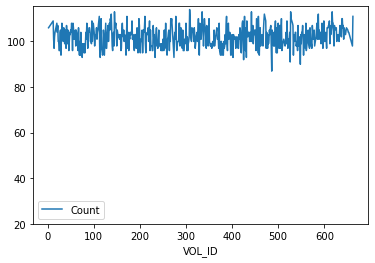

In [9]:
slices_per_volume.plot()
plt.ylim(20);

### How many volumes should be in each set?


In [10]:
train_and_val_size = 0.92
train_size = 0.85 #out of 0.9
validation_size = 0.15


In [11]:
total_vols = len(slices_per_volume)
train_and_val_vol = int(total_vols*train_and_val_size)
train_and_val_vol, train_and_val_size

(534, 0.92)

In [12]:
test_vols = total_vols - train_and_val_vol
test_vols, 1-train_and_val_size

(47, 0.07999999999999996)

In [13]:
train_vols = int(train_and_val_vol*train_size)
train_vols, train_and_val_size*train_size

(453, 0.782)

In [14]:
validation_vols = train_and_val_vol - train_vols
validation_vols, train_and_val_size*validation_size

(81, 0.138)

### How many slides should be on each set?

In [15]:
total_slices = len(slices_selected)
train_and_val_slices = int(total_slices*0.9)
train_and_val_slices, 0.9

(53350, 0.9)

In [16]:
test_slices = total_slices - train_and_val_slices
test_slices, 0.1

(5928, 0.1)

In [17]:
train_slices = int(train_and_val_slices*0.85)
train_slices, 0.9*0.85

(45347, 0.765)

In [18]:
validation_slices = train_and_val_slices - train_slices
validation_slices, 0.15*0.9

(8003, 0.135)

## Stratified vol splitting

* Get only volumes from whic we have MRI data
    * If any Volume dont have metadata: it will go to train test
* Identify volumes without metadata
* Remove duplicated
* Identify the distribution of each attribute
* Stratify volumes by Age and Sex

### Select metadata from our MRI volumes

In [19]:
IXI_metadata_xls = '../IXI-T1/IXI.xls'

In [20]:
IXI_metadata = pd.read_excel(IXI_metadata_xls)[['IXI_ID',
                                                'SEX_ID (1=m, 2=f)',
                                                'ETHNIC_ID',
                                                'AGE']].rename(columns={'ID':'Count', 'SEX_ID (1=m, 2=f)': 'SEX'})
IXI_metadata['SEX'] = IXI_metadata['SEX'].astype('category')
IXI_metadata['ETHNIC_ID'] = IXI_metadata['ETHNIC_ID'].astype('category')
IXI_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   IXI_ID     619 non-null    int64   
 1   SEX        619 non-null    category
 2   ETHNIC_ID  619 non-null    category
 3   AGE        590 non-null    float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 11.5 KB


In [21]:
IXI_metadata.sample(2)

,IXI_ID,SEX,ETHNIC_ID,AGE
551,577,2,1,64.186174
562,591,2,1,59.893224


**We select only metadata of OUR MRI VOLUMES**

In [22]:
IXI_metadata = IXI_metadata[IXI_metadata['IXI_ID'].isin(list(slices_selected['VOL_ID'].unique()))]
IXI_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 1 to 618
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   IXI_ID     591 non-null    int64   
 1   SEX        591 non-null    category
 2   ETHNIC_ID  591 non-null    category
 3   AGE        588 non-null    float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 15.5 KB


**We discover 15 volumes with no data which will be included in train test**

In [23]:
MRI_with_no_data = set(slices_selected['VOL_ID'].unique()) - set(IXI_metadata['IXI_ID'].unique())
len(MRI_with_no_data)

15

**We join the information about the number of relevant slices**

In [24]:
IXI_metadata['N_Relevant_Slices'] = IXI_metadata.apply(lambda x: slices_per_volume.loc[x['IXI_ID']], axis=1)
IXI_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 1 to 618
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   IXI_ID             591 non-null    int64   
 1   SEX                591 non-null    category
 2   ETHNIC_ID          591 non-null    category
 3   AGE                588 non-null    float64 
 4   N_Relevant_Slices  591 non-null    int64   
dtypes: category(2), float64(1), int64(2)
memory usage: 20.1 KB


In [25]:
IXI_metadata.sample(n=2)

,IXI_ID,SEX,ETHNIC_ID,AGE,N_Relevant_Slices
324,360,2,1,54.193018,99
553,579,1,1,41.215606,98


### Identify non-age volumes and remove duplicated

**We discover other 3 volumes with no data which will be included in train test**

In [26]:
non_data = IXI_metadata[IXI_metadata['AGE'].isna()]

print('Duplicados:',np.any(non_data.duplicated('IXI_ID')))
if np.any(non_data.duplicated('IXI_ID')):
    non_data = non_data.drop_duplicates(subset = 'IXI_ID')
non_data.shape

Duplicados: False


(3, 5)

In [27]:
MRI_with_no_data.update(list(non_data['IXI_ID']))
len(MRI_with_no_data)

18

In [28]:
IXI_metadata = IXI_metadata[IXI_metadata['AGE'].isna()==False]
IXI_metadata.drop_duplicates(subset = 'IXI_ID', inplace=True)
IXI_metadata.shape

(563, 5)

In [29]:
IXI_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 1 to 618
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   IXI_ID             563 non-null    int64   
 1   SEX                563 non-null    category
 2   ETHNIC_ID          563 non-null    category
 3   AGE                563 non-null    float64 
 4   N_Relevant_Slices  563 non-null    int64   
dtypes: category(2), float64(1), int64(2)
memory usage: 19.2 KB


### Identify attribute distribution
#### Age

In [30]:
pd.DataFrame(IXI_metadata['AGE'].describe())

,AGE
count,563.000000
mean,48.651764
std,16.472913
min,19.980835
25%,33.724846
50%,48.678987
75%,62.169747
max,86.318960


In [31]:
IXI_metadata.loc[IXI_metadata['AGE'] >= 65, 'AGE_GROUP'] = 'elderly'
IXI_metadata.loc[IXI_metadata['AGE'] < 25, 'AGE_GROUP'] = 'young'
IXI_metadata.loc[(IXI_metadata['AGE'] < 65) & (IXI_metadata['AGE'] > 25), 'AGE_GROUP'] = 'adult'
IXI_metadata['AGE_GROUP'] = IXI_metadata['AGE_GROUP'].astype('category')

In [32]:
pd.DataFrame(IXI_metadata['AGE_GROUP'].value_counts(normalize=True))

,AGE_GROUP
adult,0.733570
elderly,0.191829
young,0.074600


<AxesSubplot:>

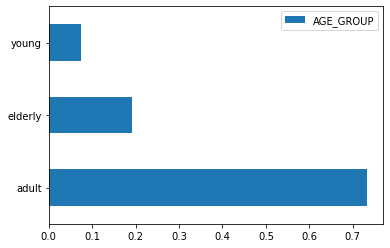

In [33]:
pd.DataFrame(IXI_metadata['AGE_GROUP'].value_counts(normalize=True)).plot(kind='barh')

#### Sex

In [34]:
pd.DataFrame(IXI_metadata['SEX'].value_counts(normalize=True))

,SEX
2,0.55595
1,0.44405


<AxesSubplot:>

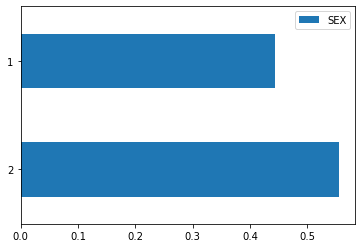

In [35]:
pd.DataFrame(IXI_metadata['SEX'].value_counts(normalize=True)).plot(kind='barh')

#### Ethnic
Due to the big difference about 1 (white) and all others, we will categorize in 1 and others.

In [36]:
IXI_metadata['ETHNIC_ID'] = IXI_metadata['ETHNIC_ID'].astype('int32')
pd.DataFrame(IXI_metadata['ETHNIC_ID'].value_counts())

,ETHNIC_ID
1,451
3,50
2,15
5,14
4,14
6,10
0,9


In [37]:
IXI_metadata.loc[IXI_metadata['ETHNIC_ID'] != 1, 'ETHNIC_ID'] = 2

In [38]:
IXI_metadata['ETHNIC_ID'] = IXI_metadata['ETHNIC_ID'].astype('category')
pd.DataFrame(IXI_metadata['ETHNIC_ID'].value_counts(normalize=True))

,ETHNIC_ID
1,0.801066
2,0.198934


<AxesSubplot:>

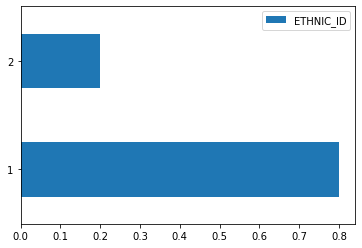

In [39]:
pd.DataFrame(IXI_metadata['ETHNIC_ID'].value_counts(normalize=True)).plot(kind='barh')

### Stratify by age and ethnic

**We know that we have to stratify volumes in 90%-10% (train&val - test)**

**We have already 18 non_metatada volumes in train&val set, so we have to stratify the remaining 563 volumes in 522 and 59.**

**We defined a module which is able to stratify a DataFrame given the categories to stratify**

In [40]:
import stratifier_complex

In [41]:
train_and_val_vol, test_vols

(534, 47)

In [42]:
IXI_metadata.shape[0]

563

#### How are going to be stratified?

##### Test

**Poblation and test sample distribution**

In [43]:
stratifier_complex.stratified_sample_report(IXI_metadata, ['ETHNIC_ID','AGE_GROUP','SEX'],test_vols)

,ETHNIC_ID,AGE_GROUP,SEX,size,samp_size
0,1,adult,1,143,12
1,1,adult,2,185,15
2,1,elderly,1,36,3
3,1,elderly,2,59,5
4,1,young,1,11,1
5,1,young,2,17,1
6,2,adult,1,44,4
7,2,adult,2,41,3
8,2,elderly,1,7,1
9,2,elderly,2,6,1


In [44]:
final_test_volumes = stratifier_complex.stratified_sample(IXI_metadata, ['ETHNIC_ID','AGE_GROUP','SEX'],test_vols)
final_test_volumes.drop(columns=['index'], axis=1, inplace = True)
final_test_volumes.shape

# dump information to that file
pkl.dump(final_test_volumes, open('data_test_volumes_df.pkl', 'wb'))

##### Train and validation

In [45]:
stratifier_complex.stratified_sample_report(IXI_metadata, ['ETHNIC_ID','AGE_GROUP','SEX'],train_and_val_vol-1)

,ETHNIC_ID,AGE_GROUP,SEX,size,samp_size
0,1,adult,1,143,135
1,1,adult,2,185,175
2,1,elderly,1,36,34
3,1,elderly,2,59,56
4,1,young,1,11,10
5,1,young,2,17,16
6,2,adult,1,44,42
7,2,adult,2,41,39
8,2,elderly,1,7,7
9,2,elderly,2,6,6


In [46]:
final_train_val_volumes = IXI_metadata[~IXI_metadata['IXI_ID'].isin(final_test_volumes['IXI_ID'])]
final_train_val_volumes.shape

(516, 6)

* **47 test volumes: 8%**
* **516+18=534 train and validation volumes: 92%**
   * **454 Train volumes 78.2% of global**, 85% of train-val.
   * **80 Validation volumes 13.8% of global**, 15% of train-val.

In [47]:
for i in MRI_with_no_data:
    final_train_val_volumes = final_train_val_volumes.append({'IXI_ID':i,
                                                             'SEX': None,
                                                              'ETHNIC_ID':None,
                                                              'AGE': None,
                                                              'N_Relevant_Slices':None,
                                                              'AGE_GROUP': None},ignore_index=True)
final_train_val_volumes['IXI_ID'] = final_train_val_volumes['IXI_ID'].astype('int64')
final_train_val_volumes.shape

(534, 6)

In [48]:
pkl.dump(final_train_val_volumes, open('data_train_val_volumes_df.pkl', 'wb'))

#### Check Number of slices in each set
##### Train&Val

In [49]:
total_slices

59278

In [50]:
total_slices-final_test_volumes['N_Relevant_Slices'].sum(), (total_slices-final_test_volumes['N_Relevant_Slices'].sum()) / total_slices *100

(54454, 91.86207361921792)

In [51]:
53184*0.85/total_slices *100

76.26168224299066

In [52]:
53184*0.15/total_slices *100

13.457943925233645

##### Test

In [53]:
final_test_volumes['N_Relevant_Slices'].sum(), final_test_volumes['N_Relevant_Slices'].sum() / total_slices *100

(4824, 8.137926380782078)

## Conclussion

### Size of each set

IMGS: [46285.9, 8168.099999999999, 4824]
VOLS: [453.9, 80.1, 47]


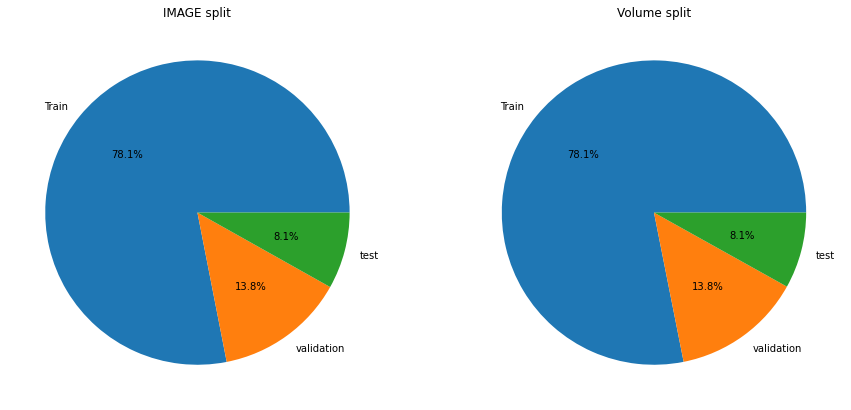

In [54]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
print('IMGS:',[(total_slices-final_test_volumes['N_Relevant_Slices'].sum())*train_size,
            (total_slices-final_test_volumes['N_Relevant_Slices'].sum())*validation_size,
            final_test_volumes['N_Relevant_Slices'].sum()])

print('VOLS:',[final_train_val_volumes.shape[0]*train_size,
            final_train_val_volumes.shape[0]*validation_size,
            final_test_volumes.shape[0]])

axs[0].set_title('IMAGE split')
axs[0].pie([(total_slices-final_test_volumes['N_Relevant_Slices'].sum())*train_size,
            (total_slices-final_test_volumes['N_Relevant_Slices'].sum())*validation_size,
            final_test_volumes['N_Relevant_Slices'].sum()],
          autopct='%1.1f%%',
          labels = ['Train', 'validation', 'test'])

axs[1].set_title('Volume split')
axs[1].pie([final_train_val_volumes.shape[0]*train_size,
            final_train_val_volumes.shape[0]*validation_size,
            final_test_volumes.shape[0]],
          autopct='%1.1f%%',
          labels = ['Train', 'validation', 'test']);



### Check attribute distributions in each set

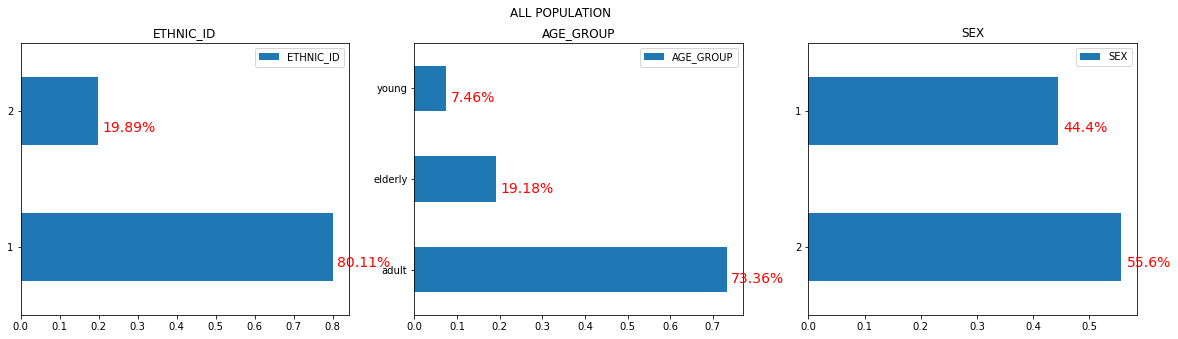

In [55]:
def plot_ccas(df, ccas, title='-'):
    fig, axs = plt.subplots(1,len(ccas), figsize=(20,5))
    fig.suptitle(title)
    for i, feat in enumerate(ccas):
        pd.DataFrame(df[feat].value_counts(normalize=True)).plot(kind='barh', ax = axs[i])
        axs[i].set_title(feat)
        totals = []
        for j in axs[i].patches:
            totals.append(j.get_width())

        # set individual bar lables using above list
        total = sum(totals)

        for j in axs[i].patches:
        # get_width pulls left or right; get_y pushes up or down
            axs[i].text(j.get_width()+.01, j.get_y()+.1, \
                    str(round((j.get_width()/total)*100, 2))+'%', fontsize=14, color='red')
            
plot_ccas(IXI_metadata, ['ETHNIC_ID','AGE_GROUP','SEX'], 'ALL POPULATION')

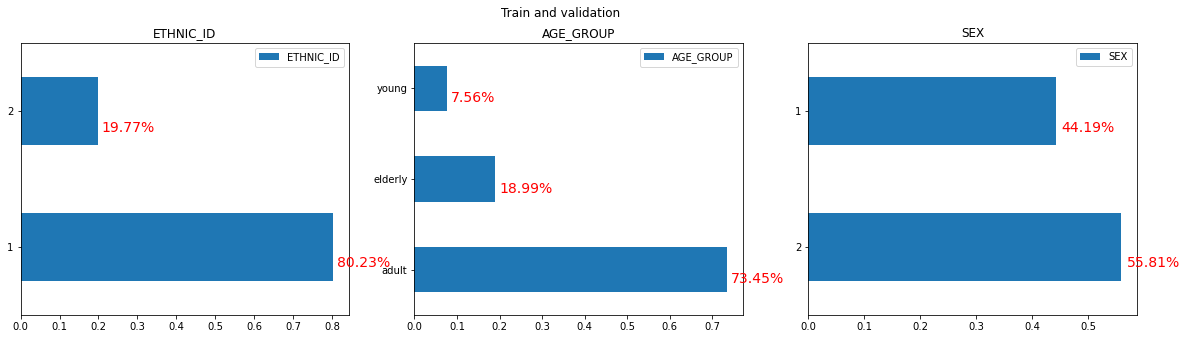

In [56]:
plot_ccas(final_train_val_volumes, ['ETHNIC_ID','AGE_GROUP','SEX'], 'Train and validation')

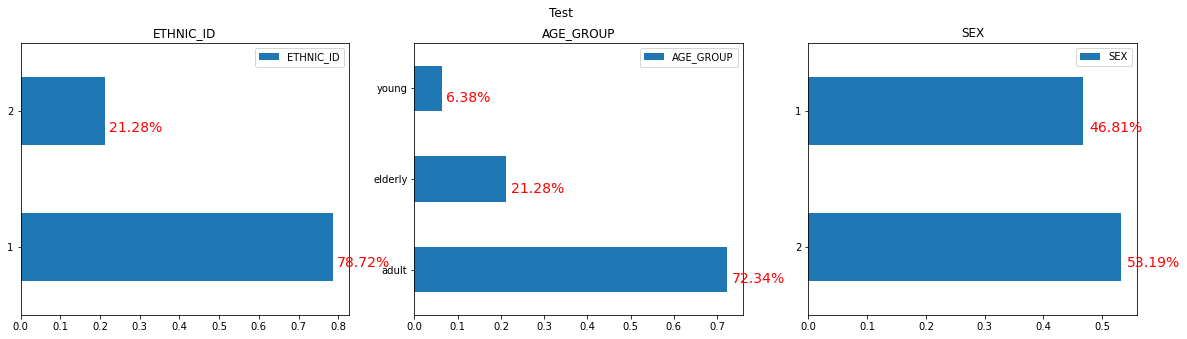

In [57]:
plot_ccas(final_test_volumes, ['ETHNIC_ID','AGE_GROUP','SEX'], 'Test')

In [58]:
final_train_val_volumes

,IXI_ID,SEX,ETHNIC_ID,AGE,N_Relevant_Slices,AGE_GROUP
0,2,2,1,35.800137,106.0,adult
1,12,1,1,38.781656,109.0,adult
2,13,1,1,46.710472,101.0,adult
3,14,2,1,34.236824,97.0,adult
4,15,1,2,24.284736,102.0,young
...,...,...,...,...,...,...
529,88,NaN,NaN,NaN,NaN,NaN
530,345,NaN,NaN,NaN,NaN,NaN
531,347,NaN,NaN,NaN,NaN,NaN
532,637,NaN,NaN,NaN,NaN,NaN
